# Time Series, Custom Class

In [1]:
# Import to be able to import python package from src
import sys
sys.path.insert(0, '../src')

In [2]:
print(sys.path)

['../src', '/workspaces/ontime', '/usr/local/lib/python310.zip', '/usr/local/lib/python3.10', '/usr/local/lib/python3.10/lib-dynload', '', '/home/vscode/.cache/pypoetry/virtualenvs/ontime-Xp74gwUA-py3.10/lib/python3.10/site-packages', '/workspaces/ontime/src']


In [3]:
import pandas as pd
import numpy as np
import ontime as on

The `LightGBM` module could not be imported. To enable LightGBM support in Darts, follow the detailed instructions in the installation guide: https://github.com/unit8co/darts/blob/master/INSTALL.md


The `Prophet` module could not be imported. To enable Prophet support in Darts, follow the detailed instructions in the installation guide: https://github.com/unit8co/darts/blob/master/INSTALL.md


---
## Generation of random time series

In [4]:
ts = on.generators.random_walk().generate(start=pd.Timestamp('2022-01-01'), end=pd.Timestamp('2022-12-31'))

In [5]:
ts[0:5]

<TimeSeries (DataArray) (time: 5, component: 1, sample: 1)>
array([[[1.50620325]],

       [[1.18954379]],

       [[2.84933314]],

       [[2.41279799]],

       [[3.74720333]]])
Coordinates:
  * time       (time) datetime64[ns] 2022-01-01 2022-01-02 ... 2022-01-05
  * component  (component) object 'random_walk'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

---
## Use `TimeSeries` object

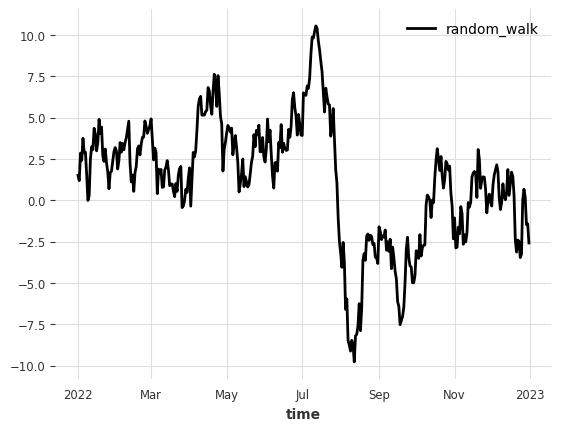

In [6]:
ts.plot();

---
## Custom Class Creation

### Create custom detector

In [7]:
from ontime.core.detector.abstract_detector import AbstractDetector

class MyDetector(AbstractDetector):

    def __init__(self):
        super().__init__()

    def detect(self, ts):
        print('I detected')
        

Load custom detector in OnTime

In [8]:
on.detectors.get_all()

['threshold', 'quantile']

In [9]:
on.detectors.load('my_detector', MyDetector)

In [10]:
on.detectors.get_all()

['threshold', 'quantile', 'my_detector']

In [11]:
on.detectors.my_detector().detect(ts)

I detected
